# Algorithm 1 Airlines Passenger Count Forecasting 

## Problem Statement:
We have considered a situation where in a given year and month, our task is to predict the number of 
international airline passengers in units of 1000. We have considered a dataset where our data ranges from
January 1949 to December 1960, or 12 years with 144 observations. 

Note: The Problem Statement is an example of univariate time series forecasting. The term "univariate time series" refers to a time series that consists of single (scalar) observations recorded sequentially over equal time increments.

### Step 1: Import csv files and data preprocessing
Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model

##### Concept 1: What is Panda?
Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks.
It is built on top of another package named Numpy, which provides support for multi-dimensional arrays.

In [8]:
import pandas as pd     #Import pandas

In [9]:
df=pd.read_csv(r"C:\Users\siba\Desktop\AirPassengers.csv") #Read CSV

In [10]:
df.head() #Display top 5 entries of the CSV File

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
df.head() #Display last 5 entries of the CSV File

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


##### Concept 2: What is Matplotlib?
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [13]:
import matplotlib.pyplot as plt  #import matplotlib

##### Concept 3: What is iloc function?
Pandas provide a unique method to retrieve rows from a Data frame. 
Dataframe.iloc[] method is used when the index label of a data frame is something other than numeric
series of 0, 1, 2, 3….n or in case the user doesn’t know the index label.
Rows can be extracted using an imaginary index position which isn’t visible in the data frame.

##### Concept 4: What is plot() function?
The plot() function in pyplot module of matplotlib library is used to make a 2D hexagonal binning plot of points x, y.
Parameters: This method accept the following parameters that are described below: 
        x, y: These parameter are the horizontal and vertical coordinates of the data points. x values are optional.

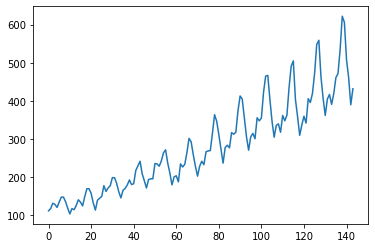

In [14]:
plt.plot(df.iloc[:,1]) #iloc[:,1:] will select all rows but your first column will be excluded from dataframe df
                       #plotting a 2D hexagonal binning plot
    #The graph plots the information present inside the CSV File
    #It shows seasonal variation in number of passengers

### Step 2: Data Transformation
Data transformation is the process in which you take data from its raw, siloed and normalized source state and transform it into data that's joined together, dimensionally modeled, de-normalized, and ready for analysis. Denormalization is used to combine multiple table data into one so that it can be queried quickly.

#### Concept 5: What is MinMaxScaler?
Transform features by scaling each feature to a given range. 
This estimator scales and translates each feature individually such that it is in the given range on the training set,
e.g. between 0 and 1.

In [15]:
from sklearn.preprocessing import MinMaxScaler #Import MinMaxScaler

In [16]:
df.iloc[:,1] #print all rows but your first column will be excluded from dataframe df

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

##### Concept 6: What is fit_transform()?
fit_transform() is used on the training data so that we can scale the training data and also learn the 
scaling parameters of that data.
The fit method is calculating the mean and variance of each of the features present in our data.

In [17]:
scaler=MinMaxScaler(feature_range=(0,1)) #Scale data between range 0 and 1. It is called normalization
df=scaler.fit_transform(df.iloc[:,1:]) #fit_transform is performed on data given by iloc function


In [18]:
df   #We print our dataframe to view its contents
#We can see that all values lie between 0 and 1

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [19]:
df.shape #total rows and columns in df

(144, 1)

### Step 3: Data Handling for Input to LSTM

In [20]:
#We divide our dataset df into two parts
#One acts like training data and other acts like testing data
training_size=int(len(df)*0.65) #We allocated first 65% of our dataset to the training set


In [21]:
training_size #Our first 93 records form the training set

93

In [22]:
test_size=len(df)-training_size #So number of records in testing set= Total records in df-Number of records in training set

In [23]:
test_size #Its value is printed here

51

In [24]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1] 
#We are storing records from row 0 to row 93 (training data records) into a dataframe train_data
#We are storing records from row 94 to last row (testing data records) into a dataframe test_data

In [25]:
test_data #Displaying values stored inside df test_data

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

##### Concept 6: What is Numpy?
NumPy is a Python library used for working with arrays. 
It also has functions for working in domain of linear algebra, fourier transform, and matrices. 

In [26]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):   #Create dataset is a function that takes inputs such as dataset and time step
                                            #Time step value is assigned by user but by default it is 1
	dataX, dataY = [], []        #dataX is our training df and dataY is test df
	for i in range(len(dataset)-time_step-1):#for value of i belonging to range(length of dataset- time_step-1) loop will run
		a = dataset[i:(i+time_step), 0]   ###Say time_steps=4, elements would be 0,1,2,3 (so count is 4 i.e our time_steps)
		dataX.append(a) #So the elements 0,1,2,3 calculated in the previous step will be stored in dataX df
		dataY.append(dataset[i + time_step, 0]) #The data given by i+time_step gets stored in dataY it is our test/output data
                                                #test data/output data is dependent on training data elements (here 0,1,2,3)
	return numpy.array(dataX), numpy.array(dataY) #function returns 2 dfs- dataX(training set), dataY (testing set)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4            #Say time_step is 4 (Assumed/Hardcoded)
X_train, y_train = create_dataset(train_data, time_step) #We call create_dataset function and their returned values are stored
                                                         #X_train --> dataX, Y_train -->dataY ; both for training set
X_test, ytest = create_dataset(test_data, time_step)     #X_test --> dataX, Y_test -->dataY ; both for testing set

In [29]:
import numpy as np
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [30]:
X_train.shape   #As we can see the reshaping done in previous step is successfull

(88, 4, 1)

### Step 4: Machine Learning Model Implementation: LSTM

##### Concept 7: What is RNN?
Recurrent Neural Network(RNN) are a type of Neural Network where the output from previous step are
fed as input to the current step. ... It uses the same parameters for each input as it performs the same task on all the inputs
or hidden layers to produce the output.

#### Concept 8: What is LSTM?
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning.  LSTM networks are well-suited to classifying, processing and making predictions based on time series data, 
since there can be lags of unknown duration between important events in a time series.



##### Concept 9: What is Tensorflow and Keras?
Keras is a neural network library while TensorFlow is the open-source library for a number of various tasks
in machine learning. TensorFlow provides both high-level and low-level APIs while Keras provides only high-level APIs.
Both frameworks thus provide high-level APIs for building and training models with ease.

#### Concept 10: What is a stacked LTSM?
A Stacked LSTM architecture can be defined as an LSTM model comprised of multiple LSTM layers.
An LSTM layer above provides a sequence output rather than a single value output to the LSTM layer below. 
Specifically, one output per input time step, rather than one output time step for all input time steps.

##### Concept 11: What are Sequential and Dense libraries?
1) Sequential: A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
    which is exactly what Stacked LTSM is all about.
    
2) Dense: The dense layer is a neural network layer that is connected deeply, 
    which means each neuron in the dense layer receives input from all neurons of its previous layer. 
    The dense layer is found to be the most commonly used layer in the models. It gives a m-sized vector as output.
    

In [31]:
# Create the LSTM model
#Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


##### Concept 12: What is compilation in Keras model?
Before training the model we need to compile it and define the loss function, optimizers for prediction. We compile the model using . compile() method. 
1) Optimizer:
Optimizers are Classes or methods used to change the attributes of your machine/deep learning model such as weights
and learning rate in order to reduce the losses.
Optimizer used here:
Adam is a replacement optimization that can handle sparse gradients on noisy problems.
In the context of deep learning, sparse gradients imply a network is not receiving strong enough signals to tune its weights

2) Loss:It is calculated as the average of the absolute difference between the actual and predicted values.
Loss used here: Mean squared error. It is calculated as the average of the squared differences 
between the predicted and actual values.

##### Concept 13: What is epoch, batch_size,verbose?
1) Epochs: One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
    Since one epoch is too big to feed to the computer at once we divide it in several smaller batches.

2) Batch_size: the number of training examples in one forward/backward pass.

3) verbose: his flag allows you to write regular expressions that look nicer and are more readable by allowing you to visually separate 
    logical sections of the pattern and add comments.
    verbose = 1, which includes both progress bar and one line per epoch.
    verbose = 0, means silent.
    verbose = 2, one line per epoch i.e. epoch no./total no. of epochs.

In [32]:
model=Sequential() #model used is sequential
model.add(LSTM(50,return_sequences=True,input_shape=(4,1))) #hidden nodes=50, time_steps=4, num_features=1, add lstm layer
model.add(LSTM(50)) #again adding lstm layer as it is stacked
model.add(Dense(1)) #specifying the output shape using Dense

model.compile(loss='mean_squared_error',optimizer='adam') #compile model

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)
#model.fit: fit() is for training the model with the given inputs (and corresponding training labels).

#So here we get the loss values for every epoch (Fitting done for 100 epochs)

Epoch 1/100
88/88 [==============================] - 29s 199ms/step - loss: 0.0420 - val_loss: 0.0593
Epoch 2/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0095 - val_loss: 0.0425
Epoch 3/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0070 - val_loss: 0.0291
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0330
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0087 - val_loss: 0.0263
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0050 - val_loss: 0.0263
Epoch 7/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0327
Epoch 8/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0232
Epoch 9/100
88/88 [==============================] - 0s 5ms/step - loss: 0.0045 - val_loss: 0.0254
Epoch 10/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0047 - val_loss: 0.0224
Epoch 

##### Concept 14: What is model.predict()?
Python predict() function enables us to predict the labels of the data values on the basis of the trained model. 
Thus, the predict() function works on top of the trained model and makes use of the learned label to map and 
predict the labels for the data to be tested.

##### Concept 15: What is Root Mean Square Error?
Root Mean Squared Error. Root mean squared error (RMSE) is the square root of the mean of the square of all of the error. 

In [33]:
### Lets Do the prediction and check performance metrics
### We are going to consider Root Mean Squared Error during prediction
train_predict=model.predict(X_train) #predict X_train and store it in train_predict df
test_predict=model.predict(X_test) #predict X_test data and store it in test_predict df

In [41]:
test_predict #after model.predict(), data in test_predict is displayed
#This is our predicted data which is the solution of our problem, however, as we can see it is scaled to values between 0 & 1 
#So we are going to denormalize it in the next step

array([[287.37338],
       [277.3349 ],
       [364.5842 ],
       [294.31653],
       [343.24014],
       [423.56845],
       [409.30542],
       [399.9283 ],
       [300.23663],
       [289.8317 ],
       [259.80905],
       [333.68472],
       [300.74054],
       [287.341  ],
       [367.19403],
       [290.54776],
       [355.4736 ],
       [433.85815],
       [438.99747],
       [428.70764],
       [251.04794],
       [328.39227],
       [240.72952],
       [335.8402 ],
       [328.1995 ],
       [300.12564],
       [423.2299 ],
       [310.5101 ],
       [415.9578 ],
       [434.43234],
       [507.17627],
       [405.473  ],
       [278.06152],
       [325.33862],
       [256.2676 ],
       [393.999  ],
       [340.70428],
       [332.80023],
       [406.94788],
       [407.66367],
       [392.1103 ],
       [518.22217],
       [521.55927],
       [336.62473],
       [291.31888],
       [307.54303]], dtype=float32)

##### Concept 16: What is inverse_transform()?
inverse_transform (X) Transforms data (denormalizes it) back to its original space.

In [34]:
##Transformback to original form (denormalization)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
test_predict #This is our predicted data which is the solution of our problem
#We have obtained this after denormalization.

array([[287.37338],
       [277.3349 ],
       [364.5842 ],
       [294.31653],
       [343.24014],
       [423.56845],
       [409.30542],
       [399.9283 ],
       [300.23663],
       [289.8317 ],
       [259.80905],
       [333.68472],
       [300.74054],
       [287.341  ],
       [367.19403],
       [290.54776],
       [355.4736 ],
       [433.85815],
       [438.99747],
       [428.70764],
       [251.04794],
       [328.39227],
       [240.72952],
       [335.8402 ],
       [328.1995 ],
       [300.12564],
       [423.2299 ],
       [310.5101 ],
       [415.9578 ],
       [434.43234],
       [507.17627],
       [405.473  ],
       [278.06152],
       [325.33862],
       [256.2676 ],
       [393.999  ],
       [340.70428],
       [332.80023],
       [406.94788],
       [407.66367],
       [392.1103 ],
       [518.22217],
       [521.55927],
       [336.62473],
       [291.31888],
       [307.54303]], dtype=float32)

In [36]:
y_train.shape,train_predict.shape #We can see here that the shapes of y_train and predict_train are same i.e 88

((88,), (88, 1))

In [37]:
train_predict #Displaying the values stored inside train_predict df

array([[126.579994],
       [120.929695],
       [133.4568  ],
       [143.9912  ],
       [143.87065 ],
       [134.64822 ],
       [121.1601  ],
       [108.36889 ],
       [118.25001 ],
       [114.474655],
       [123.715385],
       [137.13078 ],
       [132.01175 ],
       [125.024506],
       [146.64531 ],
       [163.8481  ],
       [163.02428 ],
       [154.36751 ],
       [133.85468 ],
       [118.51596 ],
       [139.37306 ],
       [140.85292 ],
       [145.92155 ],
       [173.1158  ],
       [156.02231 ],
       [169.3234  ],
       [173.54414 ],
       [193.73492 ],
       [190.19914 ],
       [177.60944 ],
       [159.94235 ],
       [147.21819 ],
       [165.39093 ],
       [165.6859  ],
       [174.71951 ],
       [187.31369 ],
       [173.78242 ],
       [179.8977  ],
       [214.7291  ],
       [218.19418 ],
       [232.6541  ],
       [193.95251 ],
       [188.78076 ],
       [170.23624 ],
       [193.4725  ],
       [188.28886 ],
       [189.70818 ],
       [233.2

In [38]:
### Calculate Root Mean Squared Error performance metrics
import math #import math library
from sklearn.metrics import mean_squared_error #this library calculates mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) #calculate root mean square error: 
                                                      #actual value: y_train, predicted value: train_predict

211.58042815641042

In [39]:
### Test Data Root Mean Squared Error
math.sqrt(mean_squared_error(ytest,test_predict)) #Calculate Root Mean Squared Error for test data

360.1904282678117

### Step 5: Display Results

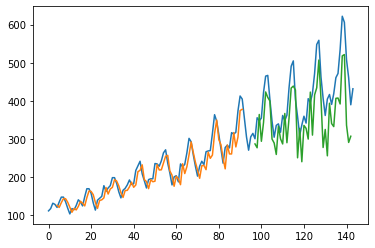

In [40]:
### Plotting 
import numpy
# shift train predictions for plotting
lookback=4                                #time_steps=4 which is called lookback
trainPredictPlot = numpy.empty_like(df)#Return a new array trainPredictPlot with the same shape and type as a given array df
trainPredictPlot[:, :] = numpy.nan #The [:, :] stands for everything from the beginning to the end
                                    #taken empty/missing values
trainPredictPlot[lookback:len(train_predict)+lookback, :] = train_predict #based on train_predict's length we take its data

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)#Return a new array testPredictPlot with the same shape and type as a given array df
testPredictPlot[:, :] = numpy.nan #The [:, :] stands for everything from the beginning to the end
                                  #taken empty/missing values
testPredictPlot[len(train_predict)+(lookback*2)+1:len(df)-1, :] = test_predict #based on test_predict's length we take its data

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df)) #yellow colour in graph- it shows test data
plt.plot(trainPredictPlot)             #blue colour in graph- it shows training data
plt.plot(testPredictPlot)              #green colour in graph- it shows predicted data (Our solution)
plt.show()


# Algorithm 2: ARIMA

### Step 1: Import csv files and data preprocessing

#### Concept 1: What is ARIMA?
1) ARIMA stands for Auto Regressive Integrated Moving Average.

2) ARIMA is a simple time series model that we can use to train and then forecast future time points.

3) ARIMA can capture complex relationships as it takes error terms (difference between actual and predicted values) and observations of lagged terms (fixed amount of passing time). 

4) These models rely on regressing a variable on past values.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline    
#allows you to add plots to the browser interface

In [49]:
df=pd.read_csv(r"C:\Users\siba\Desktop\AirPassengers.csv") #Read CSV

In [50]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [51]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [52]:
#Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month']) #converting string values in Month column to date

In [53]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [54]:
df.set_index('Month', inplace=True) #eleminating the index column

In [55]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [56]:
df.describe() #shows arithmetic operations on #Passengers column

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### Step 2: Visualize data

<AxesSubplot:xlabel='Month'>

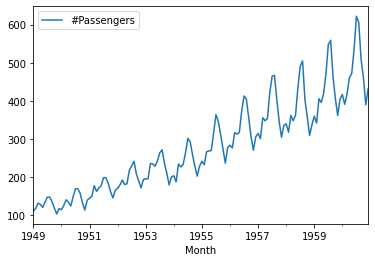

In [57]:
df.plot() #generate plot for data

In [58]:
#Test if data is stationary or not
from statsmodels.tsa.stattools import adfuller

#### Concept 2: What is adfuller?

Augmented Dickey Fuller test ( ADF Test) is a common statistical test used to test whether
a given Time series is stationary or not .

#### Concept 3: What is stationary and non stationary time series?

A stationary time series is one whose properties do not depend on the time at which the series is observed. 
Non stationary is vice versa

In [59]:
test_result=adfuller(df['#Passengers']) #carry out ADF Test on our dataset

In [60]:
#adfuller_test generates an array with the following 5 labels
def adfuller_test(passengers):
    result=adfuller(passengers)
    labels=['ADF Test Statistic', 'p-value', '#Lags used', 'Number of Observations used']
    for value,label in zip(result,labels): 
        print(label+' : '+str(value))
    if result[1] <= 0.05: #if p=value <=0.05
        print("Data is stationary")
    else:
        print("Data is non-stationary")
        
        #Now data is not stationary. We will make it stationary usig technique called differencing

In [61]:
adfuller_test(df['#Passengers'])

ADF Test Statistic : 0.8153688792060569
p-value : 0.9918802434376411
#Lags used : 13
Number of Observations used : 130
Data is non-stationary


### Step 3:Differencing

#### Concept 4: What is first difference in time series?

The first difference of a time series is the series of changes from one period to the next.

#### Concept 5: What is seasonal difference in time series?

The seasonal difference of a time series is the series of changes from one season to the next. 

In [62]:
df['Passengers First Difference'] = df['#Passengers']-df['#Passengers'].shift(1) #First difference calculation- shift=1

In [63]:
df['#Passengers'].shift(1) 

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: #Passengers, Length: 144, dtype: float64

In [64]:
df['Seasonal First Difference'] = df['#Passengers']-df['#Passengers'].shift(12) #Seasonal difference calculation- shift=12

In [65]:
df['#Passengers'].shift(12)

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01      NaN
1949-04-01      NaN
1949-05-01      NaN
              ...  
1960-08-01    559.0
1960-09-01    463.0
1960-10-01    407.0
1960-11-01    362.0
1960-12-01    405.0
Name: #Passengers, Length: 144, dtype: float64

In [66]:
#Again test dickey fuller test but this time on Seasonal first difference dataset and we also drop NaN values
adfuller_test(df['Seasonal First Difference'].dropna()) 

#Now data is stationary

ADF Test Statistic : -3.383020726492481
p-value : 0.011551493085514952
#Lags used : 1
Number of Observations used : 130
Data is stationary


<AxesSubplot:xlabel='Month'>

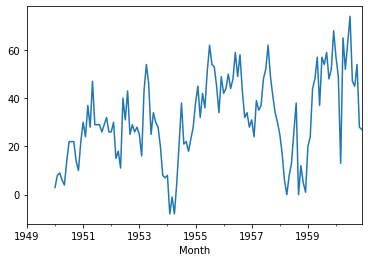

In [67]:
df['Seasonal First Difference'].plot() #plotting seasonal time series

### Step 4:Auto Regressive Model

#### Concept 6: What is auto regressive model?

Autoregression is a process of regressing a variable on past values of itself.

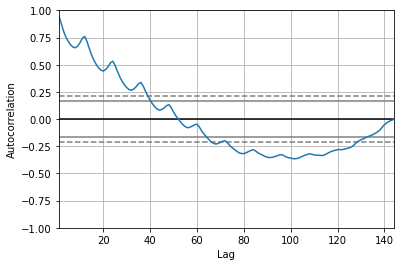

In [68]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['#Passengers'])
plt.show()

#Autocorrelations gradually decay and estimate the degree to which white noise characterizes a series of data.

In [69]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #pacf is partial auto correlation

#### Concept 7: Difference between auto correlation and partial auto correlation

Autocorrelation is a calculation of the correlation of the time series observations with values of the same series, but at previous times.The time steps at those previous times are referred to as lags. Partial Autocorrelation, on the other hand, summarizes the relationship between an observation in a time series with observations at previous time steps, but with the relationships of intervening observations removed.
Essentially, the indirect correlations are removed.

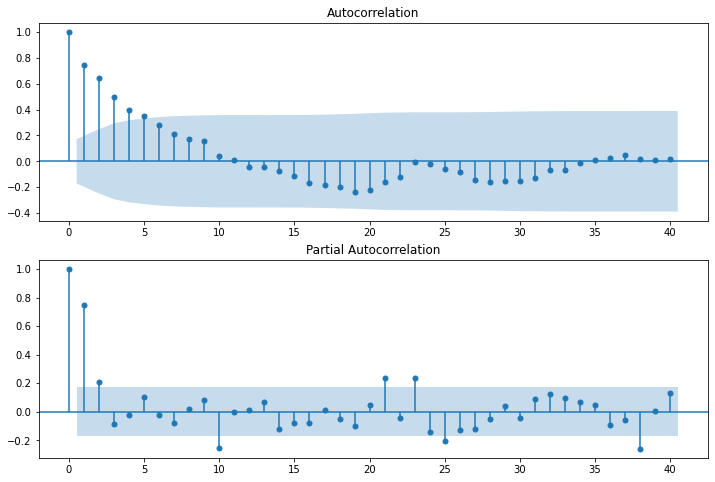

In [70]:
#passing seasonal first difference data
fig= plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40,ax=ax1) #autocorrelation
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40,ax=ax2) #partial autocorrelation

#Why iloc :13, This is because the first 12 values are NaN.
#lags value is taken randomly here

#### Concept 8: What are p,d,q values and how to set them?

For ARIMA we select 3 values- p:Auto Regression  model lags, d: differencing, q:Moving average lags
As we can see in Partial Autocorrelation diagram, in row value 1, there is a sudden drop in height, hence set p=1
As we can see in Autocorrelation diagram, graph decreases exponentially till row value 1, hence q=1
We performed seasonal differencing only once. Hence d=1

In [71]:
from statsmodels.tsa.arima_model import ARIMA


In [72]:
model=ARIMA(df['#Passengers'],order=(1,1,1)) #order has p,d,q values
model_fit=model.fit() #Model fitting is a measure of how well a machine learning model generalizes to similar data to that on which it was trained. 

C:\Users\siba\Anaconda2\envs\deeplearning\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\siba\Anaconda2\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was pro

In [73]:
model_fit.summary() #overview of the model coefficients and how well they fit, along with several other statistical measures.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Fri, 11 Jun 2021   AIC                           1402.145
Time:                        23:57:43   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.#Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.#Passengers    -1.0000      0.019    -53.425      0.000      -1.037      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3513           +0.0000j            1.3513            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

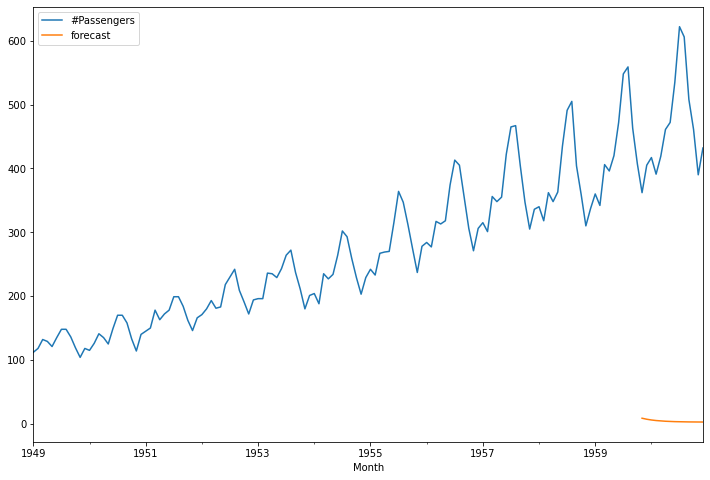

In [74]:
df['forecast']=model_fit.predict(start=130, end=143,dynamic=True) #predicting data using ARIMA
df[['#Passengers','forecast']].plot(figsize=(12,8))

#we are training it to predict for tail data (hence range is 130-143)

#### Conclusion: 

As we can see that the forecast is not correctly calculated.
This is because ARIMA doesn't work for seasonal data

# Algorithm 3: SARIMA- Seasonal ARIMA

#### Concept 1: What is Seasonal ARIMA?

A seasonal ARIMA model is formed by including additional seasonal terms in the ARIMA models. The seasonal part of the model consists of terms that are similar to the non-seasonal components of the model, but involve backshifts of the seasonal period. Backshift notation is particularly useful when combining differences. Say quarterly (4 months), annually (12 months)

In [75]:
import statsmodels.api as sm

In [76]:
#run SARIMAX
model=sm.tsa.statespace.SARIMAX(df['#Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12)) #shift value for seasonal differencing is 12
results=model.fit()

C:\Users\siba\Anaconda2\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\siba\Anaconda2\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

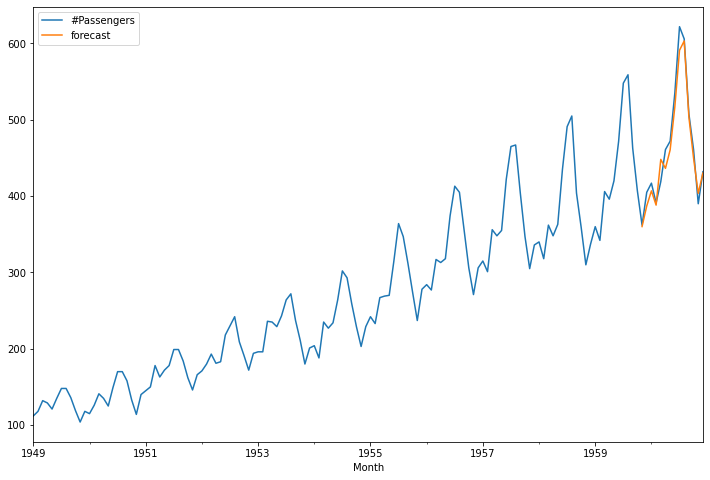

In [77]:
df['forecast']=results.predict(start=130,end=143,dynamic=True) #130,143 are indexes
df[['#Passengers','forecast']].plot(figsize=(12,8))

#prediction is given till 1961
#But we want prediction beyond that

In [78]:
#To check future forecasting
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [79]:
future_datest_df=pd.DataFrame(index=future_dates[1:], columns=df.columns) #We load the above predicted data into a dataframe

In [80]:
future_datest_df.tail()

,#Passengers,Passengers First Difference,Seasonal First Difference,forecast
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [81]:
future_df=pd.concat([df,future_datest_df]) #we concat the newly created dataframe with existing dataframe

<AxesSubplot:>

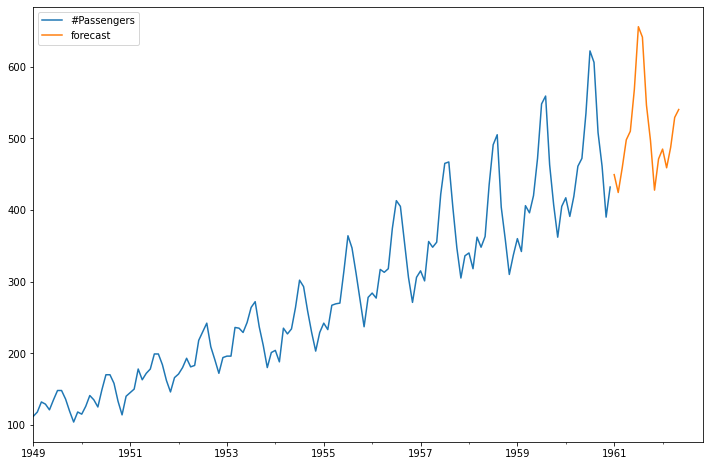

In [82]:
future_df['forecast']= results.predict(start=144, end=160, dynamic=True) #Now we carry out prediction again but this time range=144,160
future_df[['#Passengers','forecast']].plot(figsize=(12,8))

#We find that predictions are available for years exceeding 1961 too